<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/Hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завантаження відкритих даних:**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SimpleRNN
from keras.datasets import imdb
from keras.utils import pad_sequences

In [35]:
max_features = 10000     # кількість слів, що розглядаються як особливості
maxlen = 500             # обмеження кількості слів в тексті

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [36]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, label='Точність на тренуванні')
    plt.plot(epochs, val_acc, label='Точність на валідації')
    plt.title('Точність тренування і валідації')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, label='Втрати на валідації')
    plt.title('Втрати тренування і валідації')
    plt.legend()

    plt.show()

In [37]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('\nTest Loss: {:.2f}%'.format(test_loss * 100))
    print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

## RNN

In [45]:
model_rnn = Sequential(name="RNN")
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [46]:
history_rnn = model_rnn.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 202ms/step - acc: 0.5543 - loss: 0.6893 - val_acc: 0.6905 - val_loss: 0.5934
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - acc: 0.7278 - loss: 0.5478 - val_acc: 0.8023 - val_loss: 0.4528
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - acc: 0.8304 - loss: 0.3998 - val_acc: 0.8317 - val_loss: 0.3978
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - acc: 0.8698 - loss: 0.3211 - val_acc: 0.6999 - val_loss: 0.5750
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 26s 162ms/step - acc: 0.8880 - loss: 0.2785 - val_acc: 0.8353 - val_loss: 0.4060
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - acc: 0.9204 - loss: 0.2121 - val_acc: 0.8052 - val_loss: 0.5054
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - acc: 0.9182 - loss: 0.2105 - val_acc: 0.7460 - val_loss: 0.6060
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - acc: 0.9489 - loss: 0.1486 - val_acc: 0.8052 - val_loss: 0.5212
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━

In [47]:
model_rnn.summary()

Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 652,548 (2.49 MB)

 Trainable params: 326,273 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 326,275 (1.24 MB)

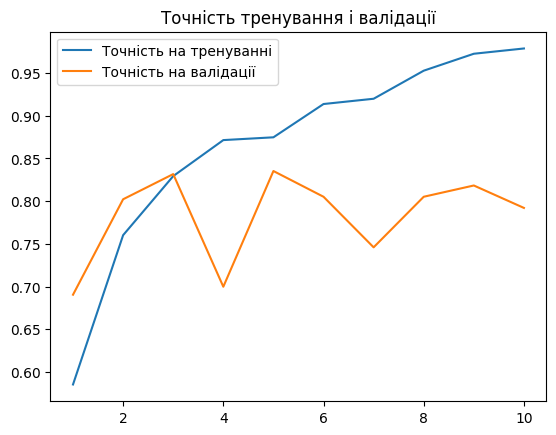

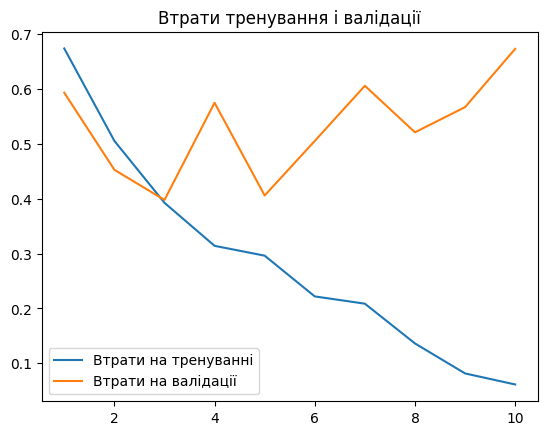

In [48]:
plot_history(history_rnn)

**Прогнозування з використанням навченої моделі:**

In [49]:
prediction(model_rnn)

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - acc: 0.7927 - loss: 0.6790

Test Loss: 65.93%
Test Accuracy: 79.57%


######################################################

## LSTM

In [50]:
model_lstm = Sequential(name="LSTM")
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [51]:
history_lstm = model_lstm.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - acc: 0.5584 - loss: 0.6783 - val_acc: 0.7813 - val_loss: 0.4804
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.7948 - loss: 0.4541 - val_acc: 0.8087 - val_loss: 0.4300
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8482 - loss: 0.3602 - val_acc: 0.8675 - val_loss: 0.3249
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - acc: 0.8736 - loss: 0.3123 - val_acc: 0.8620 - val_loss: 0.3412
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.8947 - loss: 0.2720 - val_acc: 0.8368 - val_loss: 0.3744
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.8929 - loss: 0.2724 - val_acc: 0.8476 - val_loss: 0.3883
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.9082 - loss: 0.2388 - val_acc: 0.8591 - val_loss: 0.3738
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - acc: 0.9066 - loss: 0.2425 - val_acc: 0.8837 - val_loss: 0.3127
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/

In [52]:
model_lstm.summary()

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,796 (2.63 MB)

 Trainable params: 344,897 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344,899 (1.32 MB)

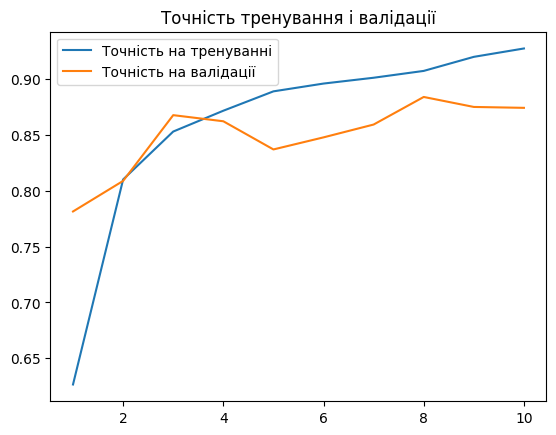

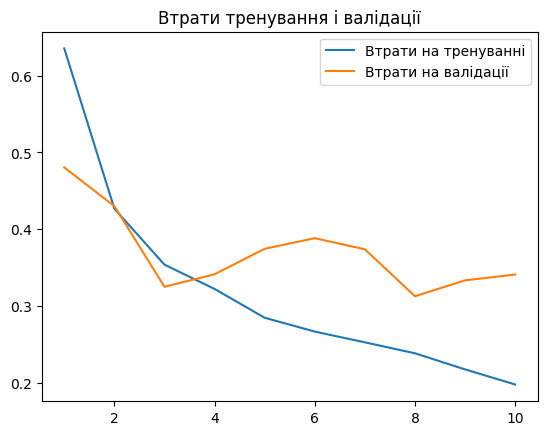

In [53]:
plot_history(history_lstm)

**Прогнозування з використанням навченої моделі:**

In [54]:
prediction(model_lstm)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8680 - loss: 0.3635

Test Loss: 35.64%
Test Accuracy: 87.06%


######################################################

##  BRNN

In [55]:
model_brnn = Sequential(name="BRNN")
model_brnn.add(Embedding(max_features, 32))
model_brnn.add(Bidirectional(LSTM(64)))
model_brnn.add(Dense(1, activation='sigmoid'))

model_brnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [56]:
history_brnn = model_brnn.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - acc: 0.5129 - loss: 0.6918 - val_acc: 0.6751 - val_loss: 0.6227
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.7439 - loss: 0.5393 - val_acc: 0.8175 - val_loss: 0.4179
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - acc: 0.8430 - loss: 0.3803 - val_acc: 0.7999 - val_loss: 0.4369
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - acc: 0.8671 - loss: 0.3267 - val_acc: 0.8576 - val_loss: 0.3335
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.8838 - loss: 0.2991 - val_acc: 0.8667 - val_loss: 0.3300
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - acc: 0.8995 - loss: 0.2572 - val_acc: 0.8641 - val_loss: 0.3291
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - acc: 0.9045 - loss: 0.2507 - val_acc: 0.8616 - val_loss: 0.3746
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - acc: 0.9048 - loss: 0.2492 - val_acc: 0.8589 - val_loss: 0.3358
Epoch 9/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s

In [57]:
model_brnn.summary()

Model: "BRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 739,588 (2.82 MB)

 Trainable params: 369,793 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 369,795 (1.41 MB)

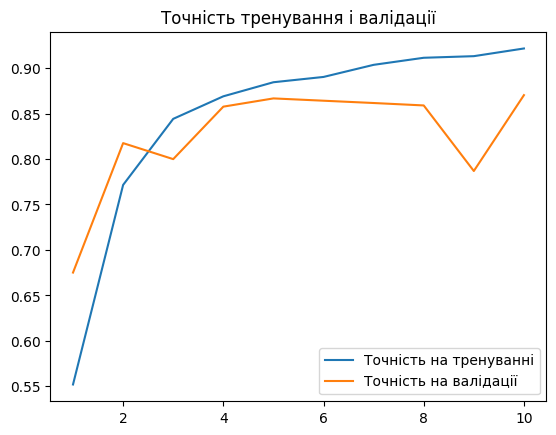

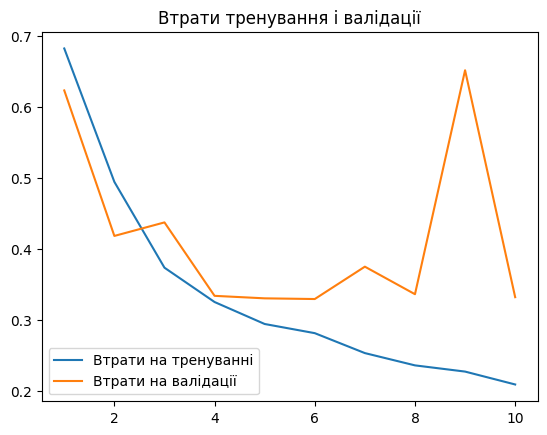

In [58]:
plot_history(history_brnn)

**Прогнозування з використанням навченої моделі:**

In [59]:
prediction(model_brnn)

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - acc: 0.8620 - loss: 0.3454

Test Loss: 34.48%
Test Accuracy: 86.46%


######################################################

## DRNN

In [60]:
model_drnn = Sequential(name="DRNN")
model_drnn.add(Embedding(max_features, 32))
model_drnn.add(Bidirectional(LSTM(64, return_sequences=True)))
model_drnn.add(Bidirectional(LSTM(128)))
model_drnn.add(Dense(1, activation='sigmoid'))

model_drnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [61]:
history_drnn = model_drnn.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - acc: 0.5020 - loss: 0.6936 - val_acc: 0.6564 - val_loss: 0.6502
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - acc: 0.7086 - loss: 0.5763 - val_acc: 0.7673 - val_loss: 0.5061
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - acc: 0.8267 - loss: 0.4019 - val_acc: 0.8409 - val_loss: 0.3721
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - acc: 0.8659 - loss: 0.3243 - val_acc: 0.8272 - val_loss: 0.4474
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - acc: 0.8867 - loss: 0.2895 - val_acc: 0.8672 - val_loss: 0.3209
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - acc: 0.9033 - loss: 0.2436 - val_acc: 0.7785 - val_loss: 0.7299
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - acc: 0.9173 - loss: 0.2197 - val_acc: 0.8488 - val_loss: 0.3505
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - acc: 0.9355 - loss: 0.1775 - val_acc: 0.8415 - val_loss: 0.3701
Epoch 9/10
137/137 ━━━━━━━━━━━━━

In [62]:
model_drnn.summary()

Model: "DRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 500, 128)            │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,266,180 (4.83 MB)

 Trainable params: 633,089 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 633,091 (2.42 MB)

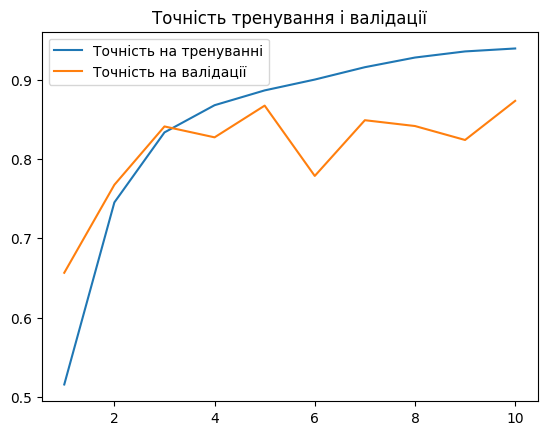

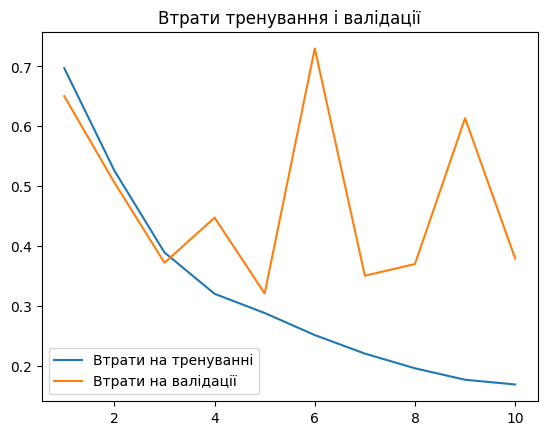

In [63]:
plot_history(history_drnn)

**Прогнозування з використанням навченої моделі:**

In [64]:
prediction(model_drnn)

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - acc: 0.8620 - loss: 0.3999

Test Loss: 39.38%
Test Accuracy: 86.57%


---

## Висновок:

Загальний висновок на основі порівняння результатів точності для різних типів рекурентних нейронних мереж (RNN, LSTM, BRNN, DRNN) при різній кількості нейронів (32 та 64):

1. **Recurrent Neural Network**: показала найнижчі
   результати серед розглянутих архітектур, особливо при кількості нейронів 64, точність склала 79.57%.
   - Це показує обмеженість простої RNN у порівнянні з більш складними архітектурами.

2. **Long Short-Term Memory**:
   - LSTM також продемонструвала найвищу точність, при кількості нейронів 32, де вона досягла 87.06%.
   
3. **Bidirectional Recurrent Neural Network**:
   - BRNN показала високі результати серед усіх представлених архітектур, з кількостю нейронів 64, вона досягла точності 86.46%.
   - Це свідчить про те, що двосторонній підхід ефективно використовує контекст з обох сторін для покращення класифікації, і збільшення кількості нейронів сприяло покращенню результатів.

4. **Deep Recurrent Neural Network** показала
   стабільні результати, при кількості нейронів 64 вона досягла точності 86,57%.
   - Це говорить про те, що для DRNN може бути менша кількість нейронів, можлива додаткова оптимізація параметрів при збільшенні розмірності.

Загальні висновки:
- LSTM є найбільш ефективною архітектурою для задачі класифікації рецензій, BRNN та DRNN при кількості нейронів 64 показують гарні результати.
- Збільшення кількості нейронів може сприяти покращенню результатів, але необхідна уважна настройка параметрів, щоб уникнути перенавчання.
- Проста RNN має обмеження у порівнянні з більш складними архітектурами, і її результати є найнижчими серед розглянутих моделей.
- Вибір оптимальної архітектури та кількості нейронів є критично важливим для досягнення високих показників точності в задачах NLP.